## Deep learning with Tensorflow

### Basics of tensorflow

In [1]:
import tensorflow as tf

In [2]:
x = [[2.]]
m = tf.matmul(x, x)

In [3]:
m

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[4.]], dtype=float32)>

In [4]:
print("Value of tensor m: {}".format(m))

Value of tensor m: [[4.]]


In [6]:
a = tf.constant([[10, 21],
                 [39, 44]])
print(a)

tf.Tensor(
[[10 21]
 [39 44]], shape=(2, 2), dtype=int32)


### Train a model

In [7]:
# Load dataset

(mnist_images, mnist_labels), _ = tf.keras.datasets.mnist.load_data()

dataset = tf.data.Dataset.from_tensor_slices(
  (tf.cast(mnist_images[...,tf.newaxis]/255, tf.float32),
   tf.cast(mnist_labels,tf.int64)))
dataset = dataset.shuffle(1000).batch(32)

11493376/11490434 [==============================] - 1s 0us/step


In [8]:
# Build the architecture

mnist_model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(16,[3,3], activation='relu', # convoutional layer
                         input_shape=(None, None, 1)),
  tf.keras.layers.Conv2D(16,[3,3], activation='relu'), # convoutional layer
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(10) # output layer
])

In [9]:
for images,labels in dataset.take(1):
  print("Logits: ", mnist_model(images[0:1]).numpy())

Logits:  [[-0.03478709  0.02481506 -0.00375026 -0.05186778 -0.02186467  0.02222434
   0.00521796  0.00821922  0.00776305  0.00244002]]


In [10]:
# Specify loss function and optimiser

optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

loss_history = []

In [15]:
# Define functions

def train_step(images, labels):
  with tf.GradientTape() as tape:
    logits = mnist_model(images, training=True)

    # Add asserts to check the shape of the output.
    tf.debugging.assert_equal(logits.shape, (32, 10))

    loss_value = loss_object(labels, logits)

  loss_history.append(loss_value.numpy().mean())
  grads = tape.gradient(loss_value, mnist_model.trainable_variables)
  optimizer.apply_gradients(zip(grads, mnist_model.trainable_variables))


def train(epochs):
  for epoch in range(epochs):
    for (batch, (images, labels)) in enumerate(dataset):
      train_step(images, labels)
    print ('Epoch {} finished'.format(epoch))

In [16]:
# Run training for 3 iterations
train(epochs = 3)

Epoch 0 finished
Epoch 1 finished
Epoch 2 finished


Text(0, 0.5, 'Loss [entropy]')

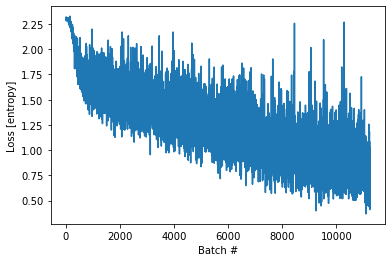

In [17]:
# Plot loss function over training iterations
import matplotlib.pyplot as plt

plt.plot(loss_history)
plt.xlabel('Batch #')
plt.ylabel('Loss [entropy]')